In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)

In [79]:
df = pd.read_csv('Egypt_Houses_Price.csv')

In [80]:
df.head()

,Property_price_EGP,Location_governorate,Location_City,Bed_Rooms,Bath_Rooms,Home_Space_SQM,Furnished,Property_Type,Payment_Option,Delivery_Date
0,"700,000",Cairo,Zahraa Al Maadi,3,1,135,No,Apartment,Cash,Ready To Move
1,"6,000,000",Cairo,Mokattam,3,3,185,No,Apartment,Cash,Ready To Move
2,"5,574,583",Cairo,New Cairo - El Tagamoa,2,2,133,No,Apartment,Cash,Ready To Move
3,"2,200,000Negotiable",NaN,145 SQM,23icon/categories/area145 SQM,NaN,icon/categories/area145,No,Apartment,Cash,Ready To Move
4,"5,400,000",Cairo,Shorouk City,3,3,210,No,Apartment,Cash,Ready To Move


In [81]:
df['Payment_Option'].unique()

array(['Cash'], dtype=object)

In [82]:
df['Delivery_Date'].unique()

array(['Ready To Move'], dtype=object)

# Drop Null and Duplicated Raws 

In [83]:
df.drop(columns=['Payment_Option','Delivery_Date'], inplace=True, axis=1)

In [84]:
df.isnull().sum()

Property_price_EGP          2
Location_governorate    11953
Location_City               2
Bed_Rooms                   2
Bath_Rooms              12158
Home_Space_SQM              0
Furnished                   0
Property_Type               0
dtype: int64

In [85]:
df.dropna(inplace=True)

In [86]:
df.isnull().sum()

Property_price_EGP      0
Location_governorate    0
Location_City           0
Bed_Rooms               0
Bath_Rooms              0
Home_Space_SQM          0
Furnished               0
Property_Type           0
dtype: int64

In [87]:
df.duplicated().sum()

15965

In [88]:
df.drop_duplicates(inplace=True)

### Fixing the Dtype for the columns

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10819 entries, 0 to 38941
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Property_price_EGP    10819 non-null  object
 1   Location_governorate  10819 non-null  object
 2   Location_City         10819 non-null  object
 3   Bed_Rooms             10819 non-null  object
 4   Bath_Rooms            10819 non-null  object
 5   Home_Space_SQM        10819 non-null  object
 6   Furnished             10819 non-null  object
 7   Property_Type         10819 non-null  object
dtypes: object(8)
memory usage: 760.7+ KB


In [90]:
def chngerF(x):
    return float(x.replace(',',''))

In [91]:
df['Property_price_EGP'] = df['Property_price_EGP'].apply(chngerF)

In [92]:
df['Bed_Rooms'] = pd.to_numeric(df['Bed_Rooms'] , downcast="float", errors='coerce')
df['Bath_Rooms'] = pd.to_numeric(df['Bath_Rooms'], downcast="float", errors='coerce')
df['Home_Space_SQM'] = pd.to_numeric(df["Home_Space_SQM"], downcast="float", errors='coerce')

In [93]:
df.dropna(inplace=True)

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

# EDA

In [94]:
for col in df.columns:
    print(col,':',df[col].nunique())
    print(df[col].value_counts().nlargest(7))
    print('\n'+'*'*20+'\n')

Property_price_EGP : 901
3000000.0    182
2000000.0    173
1500000.0    173
2500000.0    168
3500000.0    154
4500000.0    145
4000000.0    129
Name: Property_price_EGP, dtype: int64

********************

Location_governorate : 25
Cairo          5115
Giza           1757
Matruh         1391
Alexandria      983
Suez            560
South Sinai     153
Red Sea         141
Name: Location_governorate, dtype: int64

********************

Location_City : 201
New Cairo - El Tagamoa    1878
Madinaty                  1306
North Coast               1249
Sheikh Zayed               823
Ain Sukhna                 539
Rehab City                 507
6th of October             432
Name: Location_City, dtype: int64

********************

Bed_Rooms : 10
3.0    4591
2.0    2531
4.0    1622
5.0     776
1.0     364
6.0     345
7.0      90
Name: Bed_Rooms, dtype: int64

********************

Bath_Rooms : 10
2.0    3152
1.0    2474
3.0    2315
4.0    1371
5.0     659
6.0     285
7.0      89
Name: Bath_Rooms, 

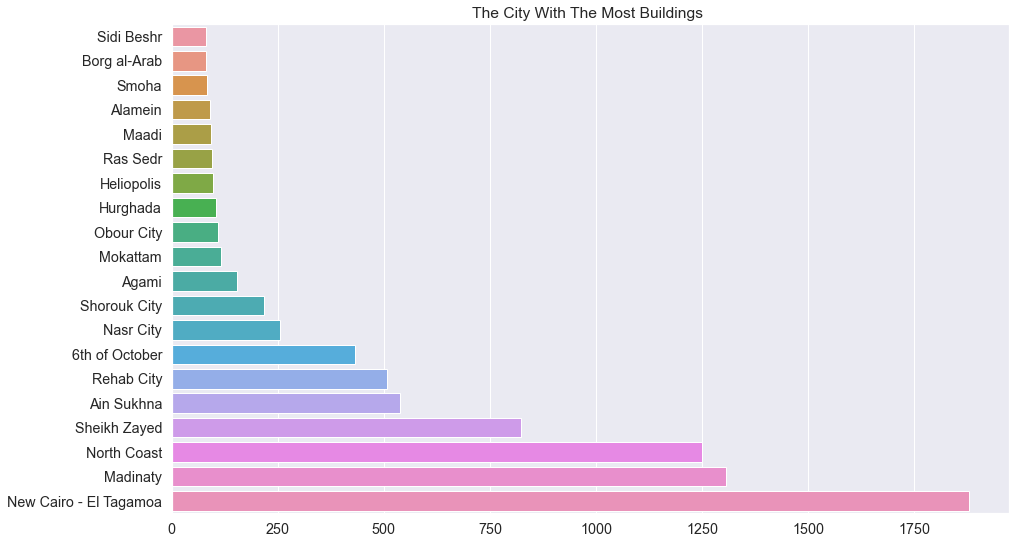

In [95]:
mp = df['Location_City'].value_counts()[0:20].sort_values()
sns.barplot(y=mp.index,x=mp.values);
plt.title('The City With The Most Buildings ');

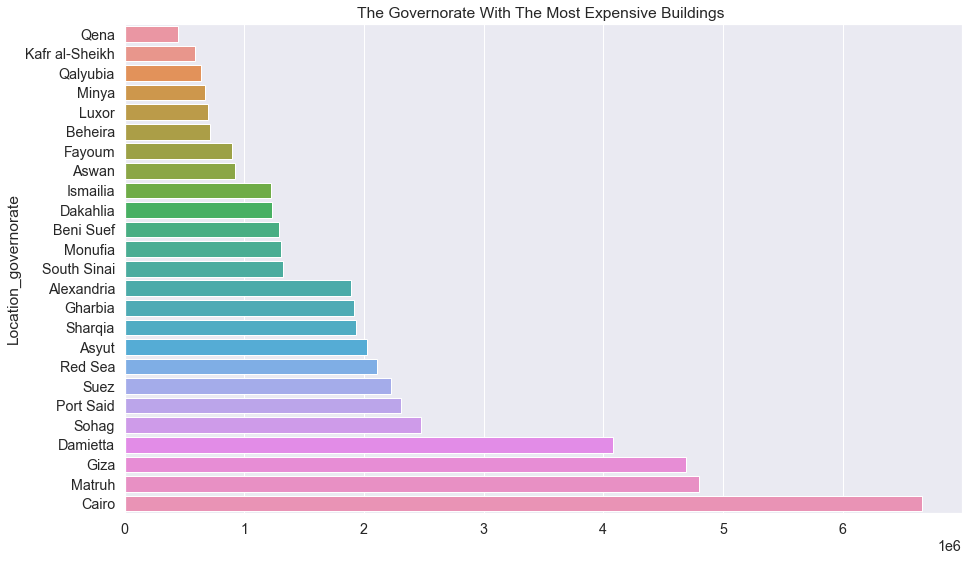

In [96]:
phm = df.groupby(['Location_governorate'])['Property_price_EGP'].mean().sort_values()
sns.barplot(y=phm.index,x=phm.values);
plt.title('The Governorate With The Most Expensive Buildings ');

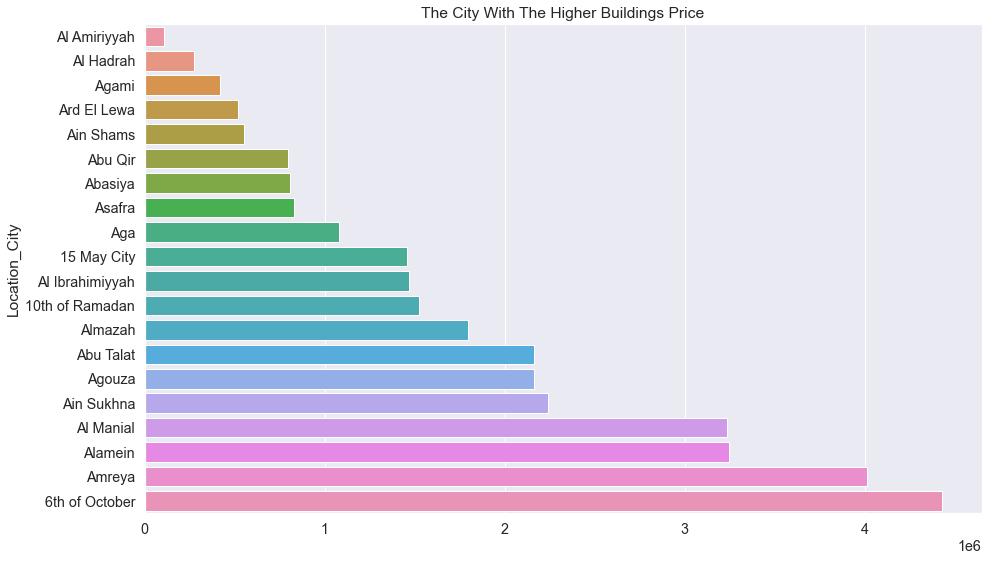

In [97]:
lpm = df.groupby('Location_City')['Property_price_EGP'].mean()[0:20].sort_values()
sns.barplot(y=lpm.index,x=lpm.values);
plt.title('The City With The Higher Buildings Price');

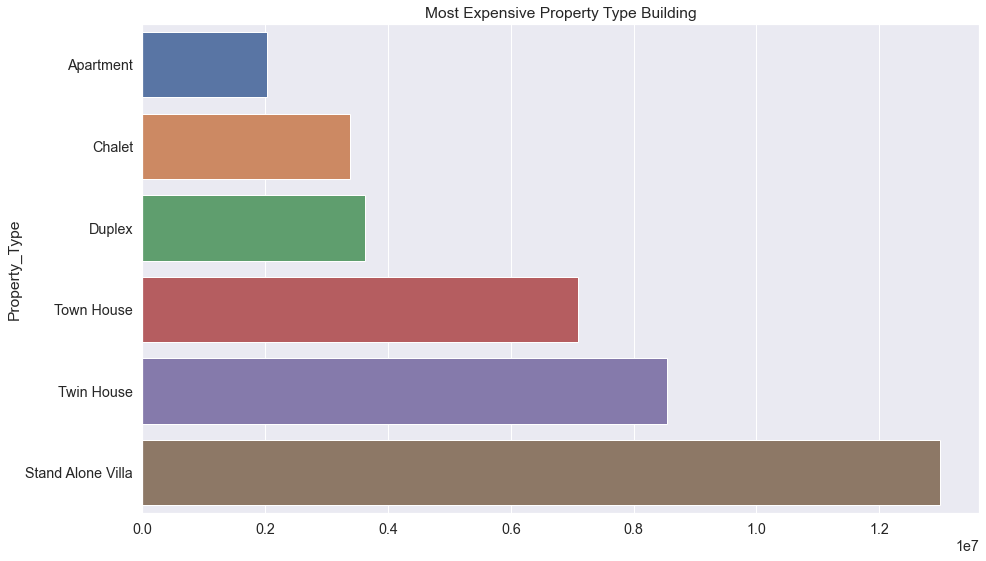

In [98]:
lpp = df.groupby('Property_Type')['Property_price_EGP'].mean().sort_values()
sns.barplot(y=lpp.index,x=lpp.values);
plt.title('Most Expensive Property Type Building');

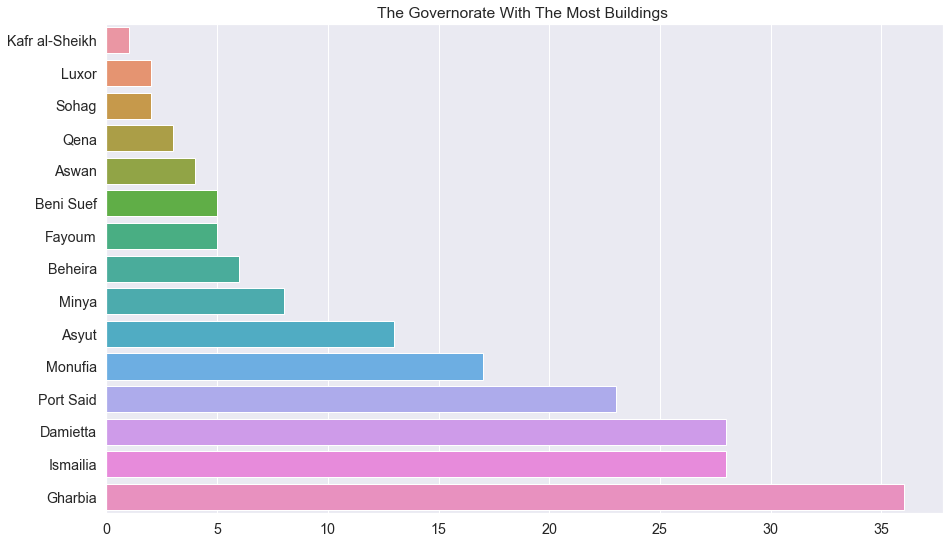

In [99]:
lgvc = df['Location_governorate'].value_counts().sort_values()[0:15]
sns.barplot(y=lgvc.index,x=lgvc.values);
plt.title('The Governorate With The Most Buildings ');

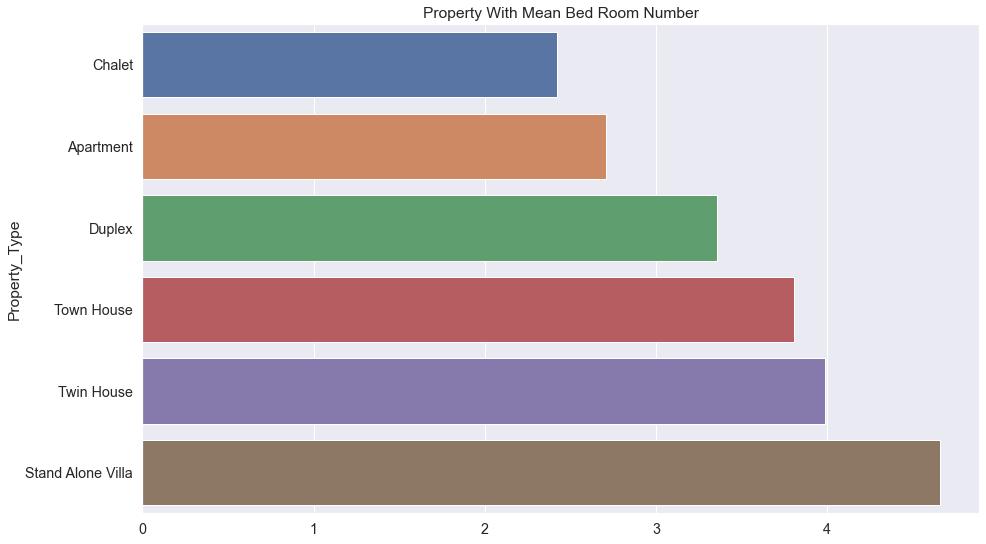

In [100]:
lpb = df.groupby('Property_Type')['Bed_Rooms'].mean().sort_values()
sns.barplot(y=lpb.index,x=lpb.values);
plt.title('Property With Mean Bed Room Number');

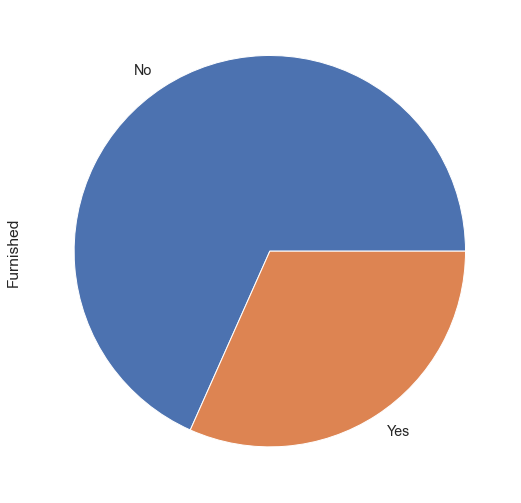

In [101]:
df['Furnished'].value_counts().plot(kind='pie');

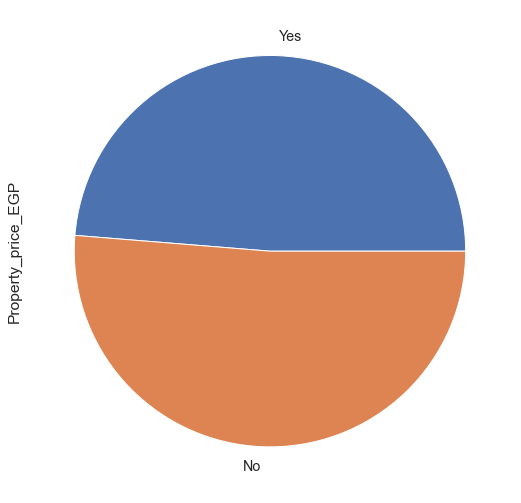

In [102]:
df.groupby('Furnished')['Property_price_EGP'].mean().sort_values().plot(kind='pie');

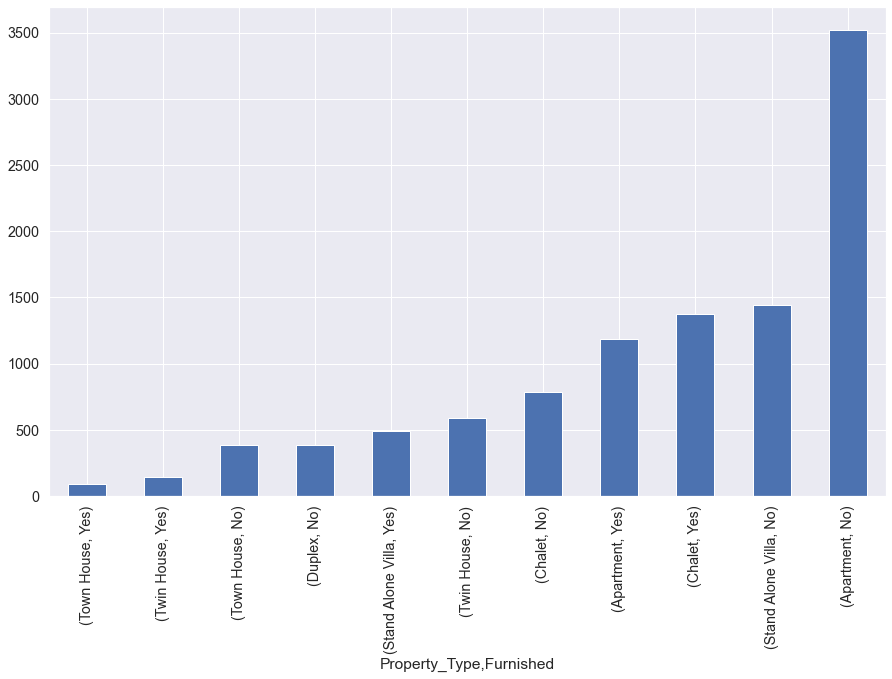

In [103]:
df.groupby('Property_Type')['Furnished'].value_counts().sort_values().plot(kind='bar');

In [104]:
df.groupby(['Location_City'])['Property_price_EGP'].describe()

,count,mean,std,min,25%,50%,75%,max
Location_City,,,,,,,,
10th of Ramadan,25.0,1.527000e+06,1.849629e+06,100000.0,260000.00,850000.0,2250000.00,7500000.0
15 May City,7.0,1.459286e+06,1.903375e+06,80000.0,292500.00,800000.0,1625000.00,5500000.0
6th of October,432.0,4.428679e+06,4.410620e+06,55000.0,1400000.00,2970000.0,6500000.00,35000000.0
Abasiya,5.0,8.080000e+05,5.910330e+05,40000.0,600000.00,600000.0,1300000.00,1500000.0
Abu Qir,11.0,7.990909e+05,1.095780e+06,140000.0,262500.00,400000.0,825000.00,4000000.0
Abu Talat,17.0,2.161176e+06,4.912682e+06,140000.0,250000.00,600000.0,1100000.00,20300000.0
Aga,1.0,1.080750e+06,NaN,1080750.0,1080750.00,1080750.0,1080750.00,1080750.0
Agami,155.0,4.191484e+05,6.500840e+05,80000.0,200000.00,270000.0,400000.00,7000000.0
Agouza,15.0,2.165333e+06,2.422941e+06,40000.0,950000.00,1350000.0,2300000.00,10000000.0


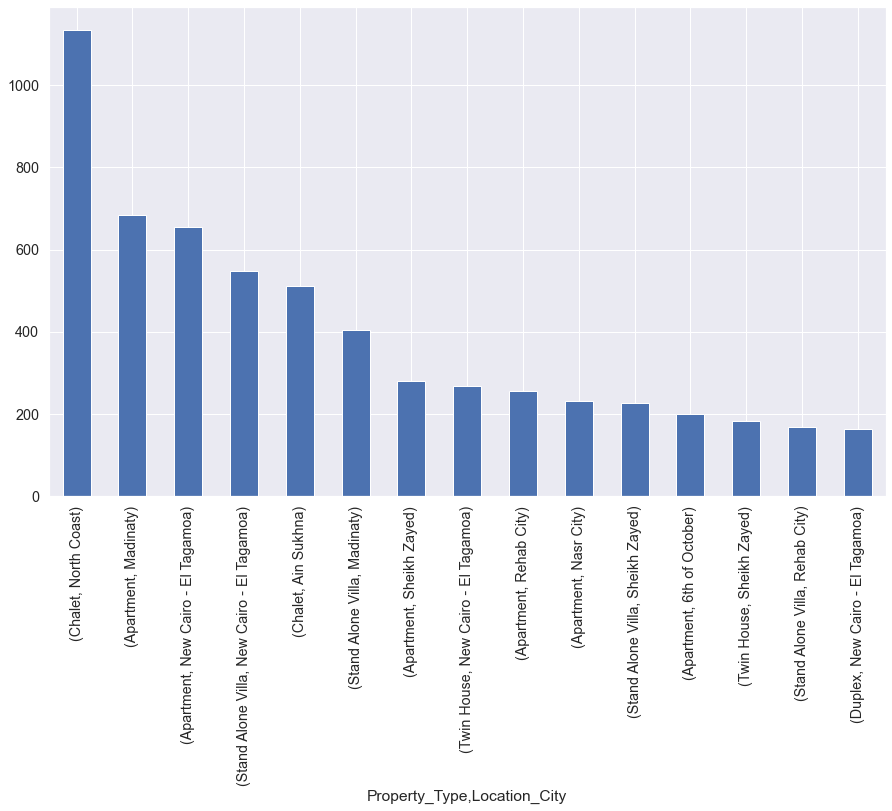

In [105]:
df.groupby('Property_Type')['Location_City'].value_counts().nlargest(15).plot(kind='bar');
#number of property type in every city

In [106]:
df.groupby('Property_Type')['Location_City'].value_counts()

Property_Type      Location_City            
Apartment          Madinaty                      683
                   New Cairo - El Tagamoa        654
                   Sheikh Zayed                  281
                   Rehab City                    255
                   Nasr City                     232
                   6th of October                201
                   Agami                         102
                   Maadi                          81
                   Sidi Beshr                     78
                   Smoha                          78
                   Heliopolis                     77
                   Obour City                     77
                   Badr City                      73
                   Miami                          71
                   Hurghada                       67
                   Haram                          65
                   Hadayek al-Ahram               63
                   Faisal                         62
 

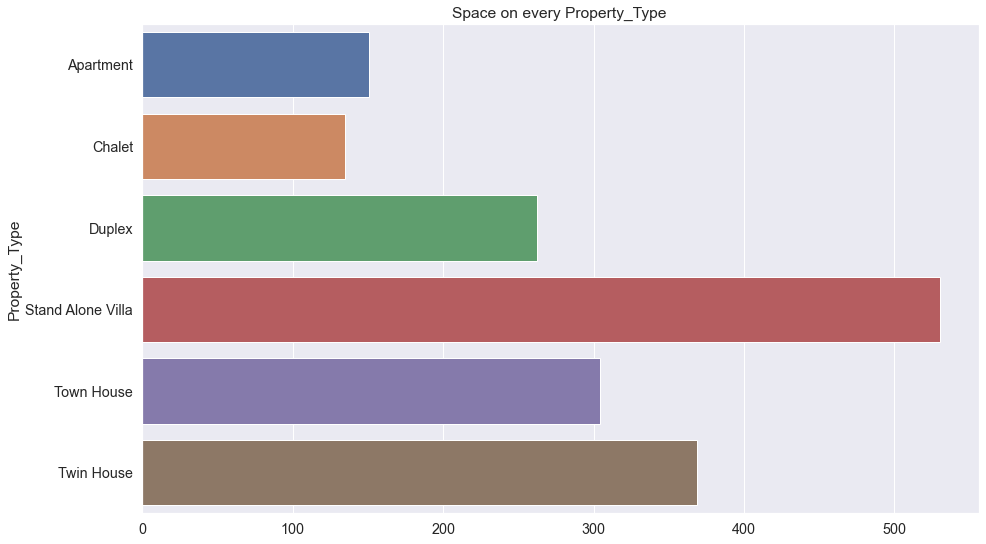

In [107]:
phm = df.groupby(['Property_Type'])['Home_Space_SQM'].mean()
sns.barplot(y=phm.index,x=phm.values);
plt.title('Space on every Property_Type ');

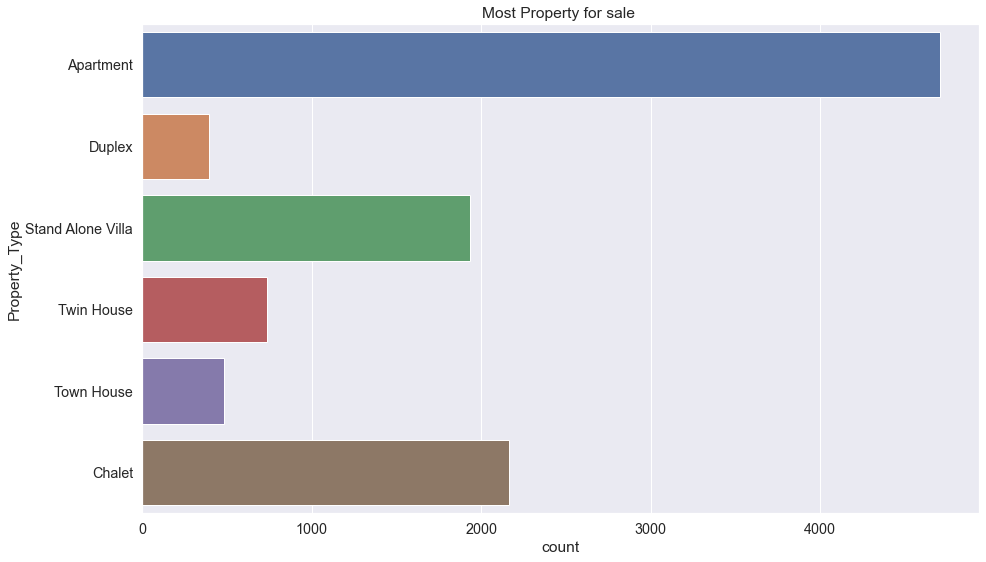

In [108]:
sns.countplot(data = df, y = 'Property_Type');
plt.title('Most Property for sale ');

# from Visualization we did we can say that most importal ponints: 
### ـــ Price depend on the city highly then on space of the property.
### ـــ Furnished or Not Furnished not effect highly on Price.
### ـــ After Cairo Coastal cities the most expensive property. 

$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$
$\;\;\;\;\;\;$

$\;\;\;\;\;\;$
$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

## Deleting Location_City that have less than 5 rows

In [109]:
pd.set_option('display.max_rows', 500)
df['Location_City'].value_counts(ascending=True)

Ras Gharib                      1
Darrasa                         1
Koum al-Dikka                   1
Hawamdeya                       1
Baliana                         1
Nasr al-Noba                    1
Attarin                         1
Khosous                         1
Safaga                          1
Zefta                           1
Bashtil                         1
Tod                             1
Kerdasa                         1
Kafr al-Zayat                   1
Markaz al-Giza                  1
Dawahy District                 1
Dhahria                         1
Wardian                         1
Menouf                          1
Ataba                           1
Markaz Sohag                    1
Baragil                         1
Nag Hammadi                     1
Luxor City                      1
Tookh                           1
Baltim                          1
New Assiut                      1
New Mansoura                    1
Aga                             1
Marsa Alam    

In [110]:
ind = df['Location_City'].value_counts(dropna=False).keys().tolist()
val = df['Location_City'].value_counts(dropna=False).tolist()
value_dict = list(zip(ind, val))

In [111]:
len(value_dict)

201

In [112]:
lc_sm = []
for val,ind in value_dict:
    if ind <= 5:
        lc_sm.append(val)
    else :
        pass

In [113]:
y = 'Less'
def lcdlt(x):
    if x in lc_sm:
        return y
    else :
        return x

In [114]:
df['Location_City'] = df['Location_City'].apply(lcdlt)

In [115]:
df[(df['Location_City']=='Less')]

,Property_price_EGP,Location_governorate,Location_City,Bed_Rooms,Bath_Rooms,Home_Space_SQM,Furnished,Property_Type
6,970000.0,Dakahlia,Less,2.0,2.0,121.0,No,Apartment
132,350000.0,Qalyubia,Less,3.0,1.0,85.0,No,Apartment
247,170000.0,Red Sea,Less,2.0,1.0,66.0,No,Apartment
262,475000.0,Alexandria,Less,2.0,1.0,70.0,No,Apartment
459,560000.0,Fayoum,Less,2.0,1.0,121.0,No,Apartment
526,320000.0,Giza,Less,2.0,1.0,100.0,No,Apartment
557,1500000.0,Alexandria,Less,3.0,1.0,115.0,No,Apartment
644,6200000.0,Giza,Less,5.0,6.0,486.0,No,Apartment
666,900000.0,Port Said,Less,2.0,1.0,105.0,No,Apartment
757,850000.0,Port Said,Less,3.0,2.0,109.0,No,Apartment


In [116]:
df=df.drop(df[(df['Location_City']=='Less')].index)

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

### dedecte outliers of Property_price for every Location_City

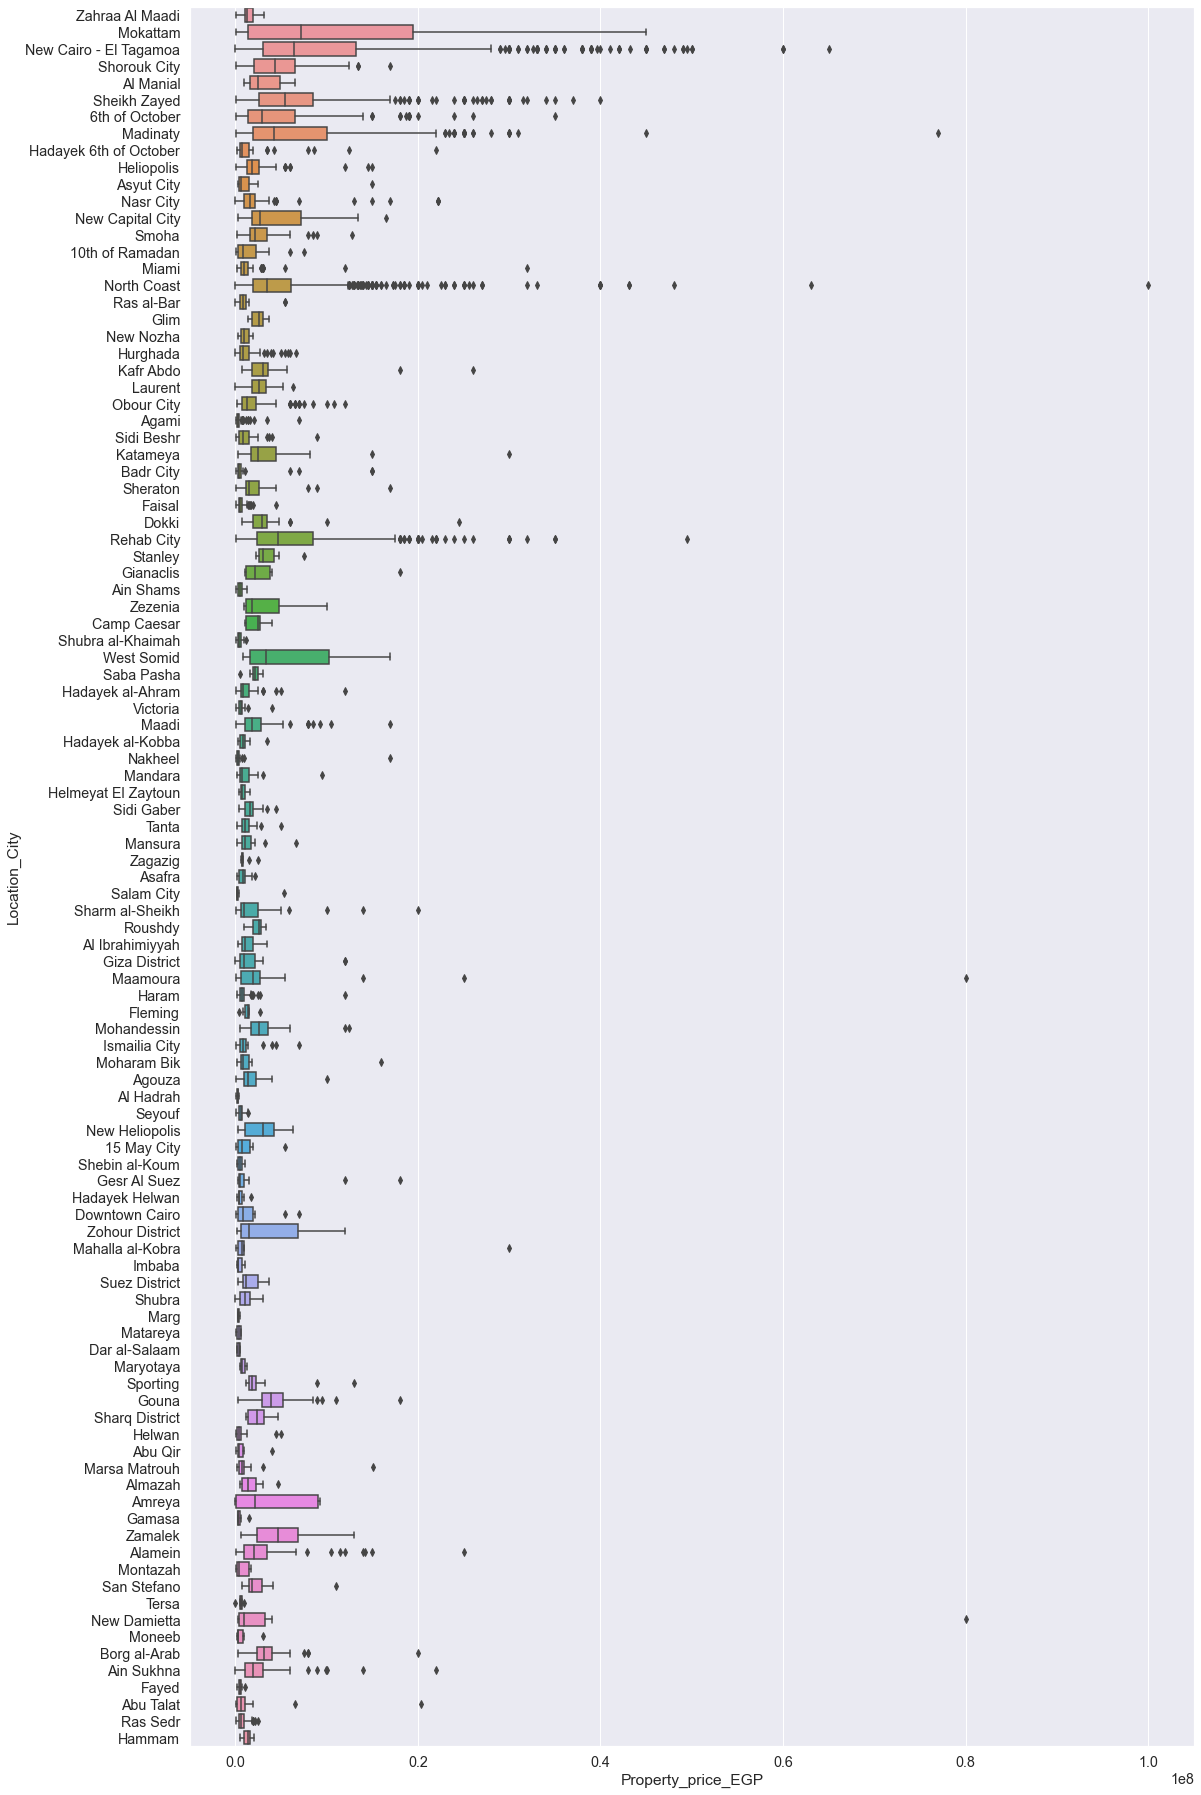

In [117]:
plt.subplots(figsize=(18, 32))
sns.boxplot(y='Location_City', x='Property_price_EGP', data=df);

In [118]:
lcc = df['Location_City'].value_counts().keys().tolist()

In [119]:
df=df.drop(df[(df['Property_price_EGP']<=100000)].index)
df=df.drop(df[(df['Location_City']=='North Coast')&(df['Property_price_EGP']<=500000)].index)

In [120]:
for x in lcc:
    Q1= df[(df['Location_City']==x)]['Property_price_EGP'].quantile(0.25)
    Q3= df[(df['Location_City']==x)]['Property_price_EGP'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df=df.drop(df[(df['Location_City']==x)&(df['Property_price_EGP']>=upper_bound)].index)

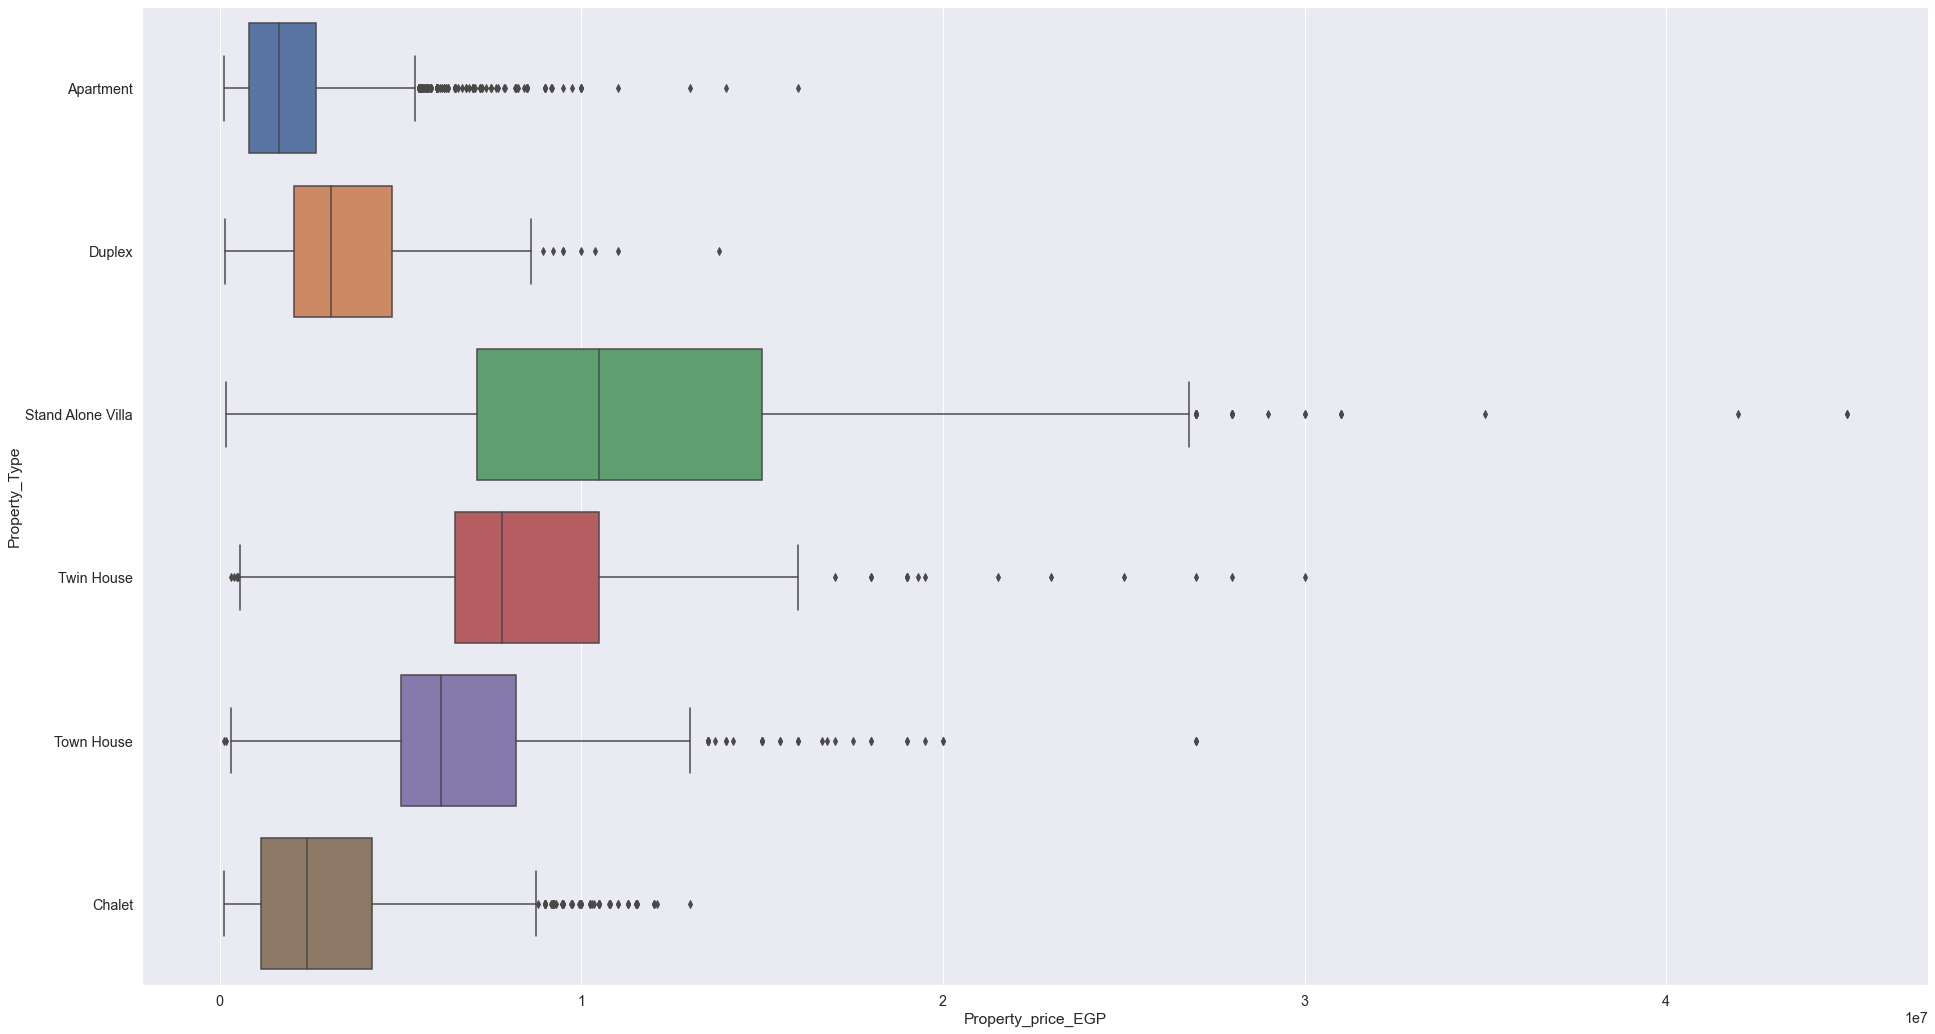

In [121]:
plt.subplots(figsize=(32, 18))
sns.boxplot(y='Property_Type', x='Property_price_EGP', data=df);

#outliers here are normal because the big difference in Location_City that make price gap

In [122]:
ind=(df.groupby('Location_City')['Property_price_EGP'].sum()/df.groupby('Location_City')['Home_Space_SQM'].sum()).sort_values(ascending=False)[0:30].index
vlu=(df.groupby('Location_City')['Property_price_EGP'].sum()/df.groupby('Location_City')['Home_Space_SQM'].sum()).sort_values(ascending=False)[0:30].values

In [123]:
(df.groupby('Location_City')['Property_price_EGP'].sum()/df.groupby('Location_City')['Home_Space_SQM'].sum()).sort_values(ascending=False)

Location_City
Gouna                     39473.684211
Mokattam                  37900.294796
North Coast               25685.695581
New Cairo - El Tagamoa    24886.988517
Zamalek                   23846.863469
Madinaty                  21661.940585
Rehab City                19696.235363
Sheikh Zayed              17954.320228
Ain Sukhna                17484.374507
Camp Caesar               16287.878788
Al Manial                 15972.222222
Katameya                  15874.700445
Alamein                   15844.627077
Stanley                   15598.886490
Zezenia                   14535.901926
Sharq District            14522.058824
6th of October            14390.763078
Smoha                     14385.616191
West Somid                14363.461230
Kafr Abdo                 14346.244383
Laurent                   13994.179973
Glim                      13877.832211
Roushdy                   13781.572394
Zohour District           13525.139665
New Capital City          13519.464056
Maamoura   

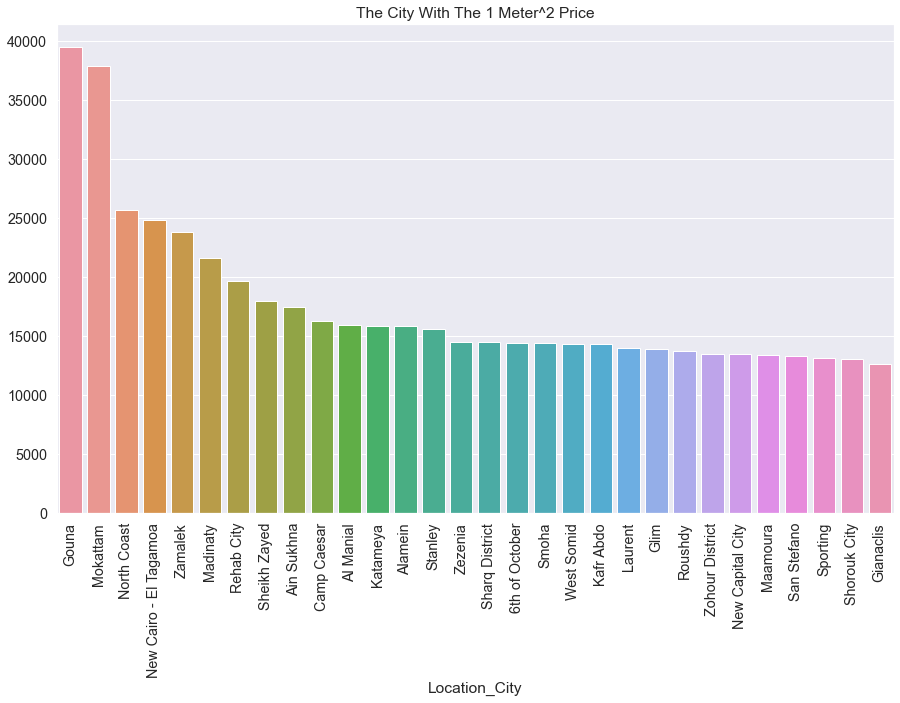

In [124]:

sns.barplot(data = df, x = ind ,y= vlu ,ci = None,order = ind);
plt.xticks(rotation=90);
plt.title('The City With The 1 Meter^2 Price');

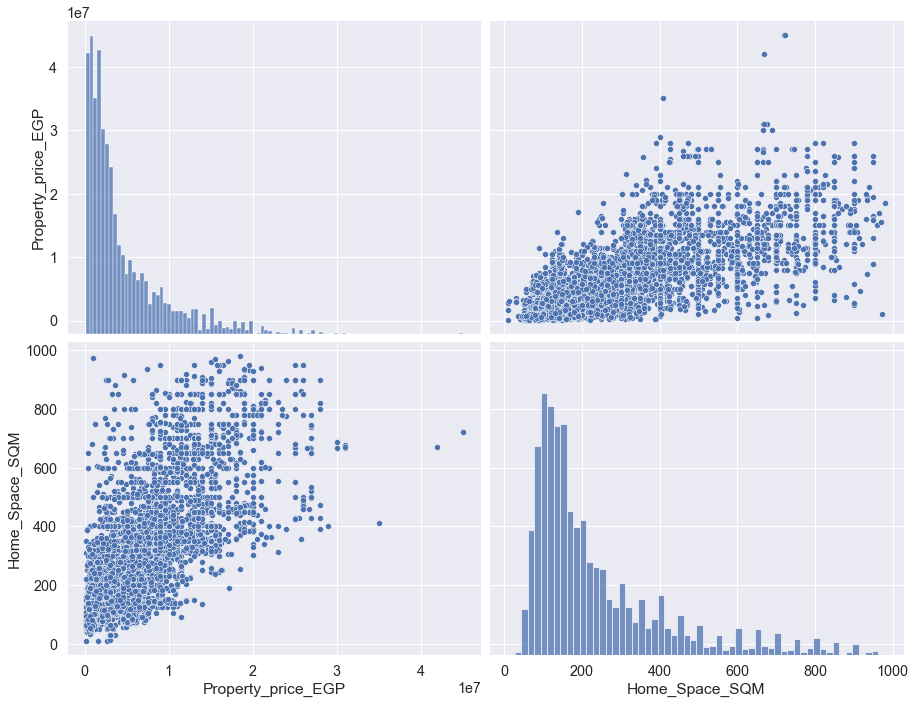

In [125]:
sns.pairplot(df, vars = ['Property_price_EGP', 'Home_Space_SQM'], height=5, aspect=1.3);

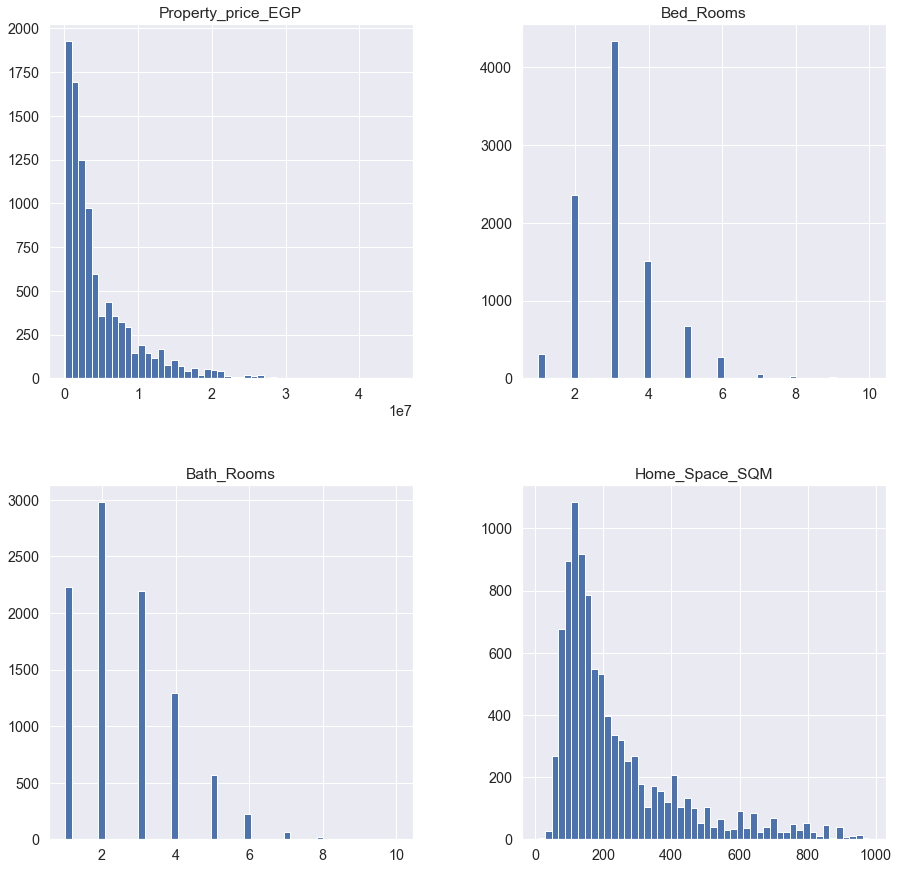

In [126]:
df.hist(bins=50, figsize=(15, 15));

### drop some data depending on pairplot Graphs

In [127]:
df=df.drop(df[(df['Location_City']=='New Cairo - El Tagamoa')&(df['Property_price_EGP']>=26000000)].index)
df=df.drop(df[(df['Location_City']=='Gouna')&(df['Property_price_EGP']>=8000000)].index)
df=df.drop(df[(df['Location_City']=='Katameya')&(df['Property_price_EGP']>=6000000)].index)
df=df.drop(df[(df['Home_Space_SQM']<=800)&(df['Property_price_EGP']>=40000000)].index)
df=df.drop(df[(df['Location_City']=='Sheikh Zayed')&(df['Property_price_EGP']>=16000000)].index)
df=df.drop(df[(df['Location_City']=='6th of October')&(df['Property_price_EGP']>=11000000)].index)
df=df.drop(df[(df['Location_City']=='Madinaty')&(df['Property_price_EGP']>=20000000)].index)
df=df.drop(df[(df['Location_City']=='North Coast')&(df['Property_price_EGP']>=10500000)].index)

In [128]:
df['Location_City'].value_counts()

New Cairo - El Tagamoa    1777
Madinaty                  1223
North Coast               1091
Sheikh Zayed               772
Ain Sukhna                 521
Rehab City                 473
6th of October             393
Nasr City                  243
Shorouk City               214
Agami                      138
Mokattam                   111
Obour City                  94
Ras Sedr                    89
Hurghada                    87
Heliopolis                  87
Maadi                       84
Alamein                     81
Smoha                       79
Borg al-Arab                78
Sidi Beshr                  75
Badr City                   74
Hadayek al-Ahram            73
Miami                       66
Haram                       66
Faisal                      65
Mohandessin                 64
Hadayek 6th of October      59
Sharm al-Sheikh             53
Mandara                     40
New Capital City            40
Nakheel                     39
Dokki                       38
Gesr Al 

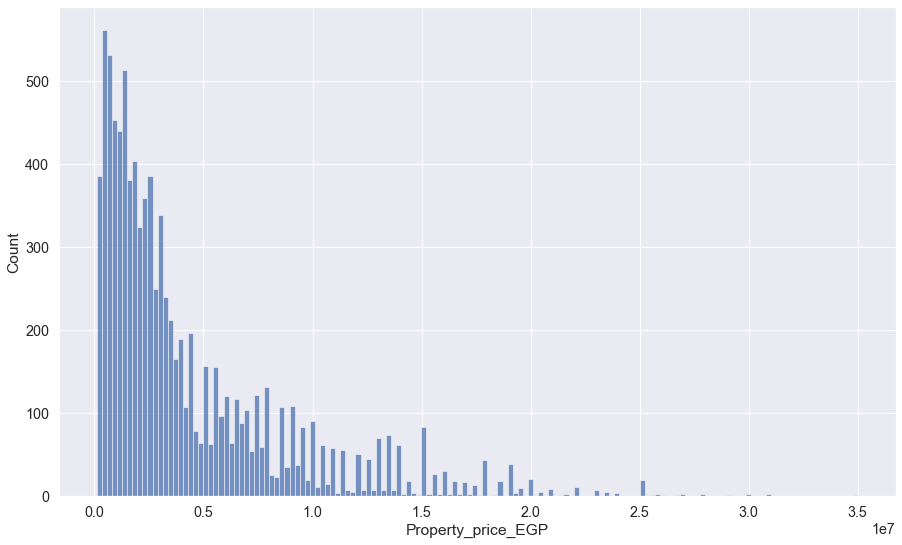

In [129]:
sns.histplot(data=df,x='Property_price_EGP',bins=150);

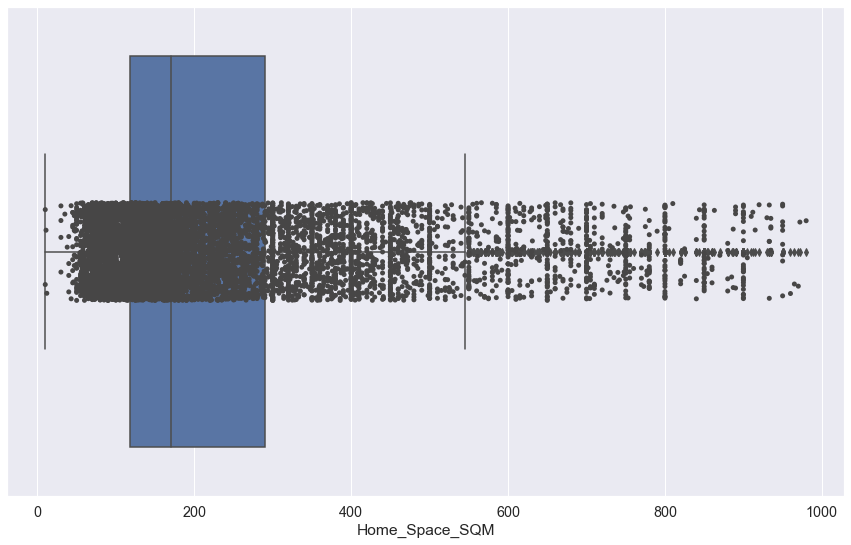

In [130]:
sns.boxplot(x='Home_Space_SQM', data=df)
sns.stripplot(x='Home_Space_SQM', data=df, color="#474646");

<AxesSubplot:xlabel='Property_price_EGP'>

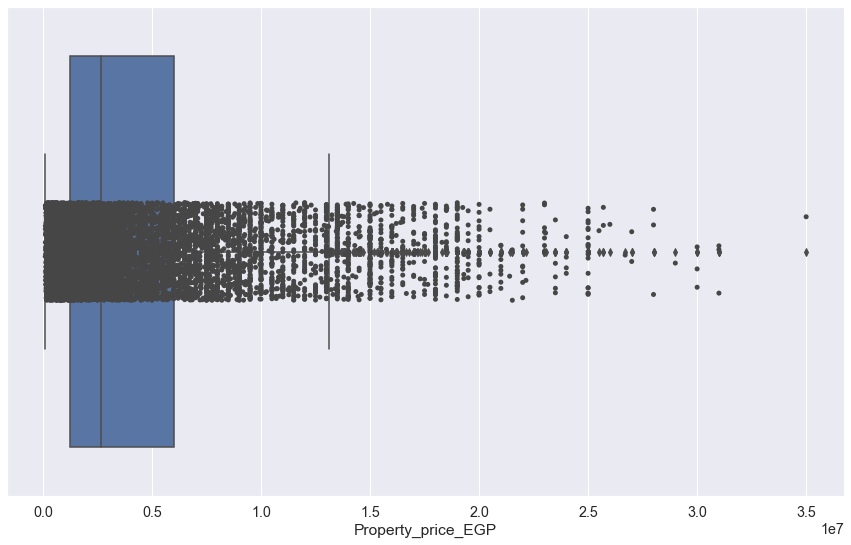

In [131]:
sns.boxplot(x='Property_price_EGP', data=df)
sns.stripplot(x='Property_price_EGP', data=df, color="#474646")

<AxesSubplot:xlabel='Home_Space_SQM', ylabel='Count'>

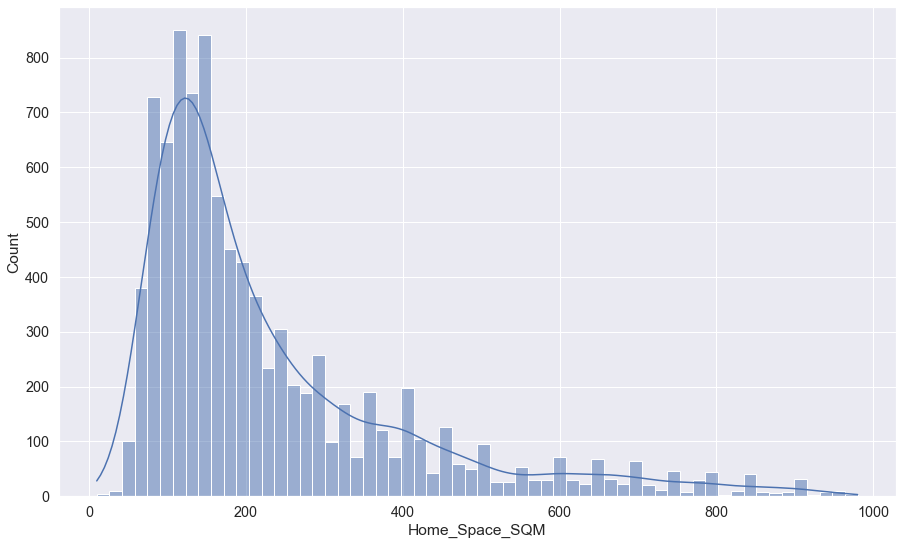

In [132]:
sns.histplot(data = df, x ='Home_Space_SQM', kde = True)

<AxesSubplot:xlabel='Property_price_EGP', ylabel='Count'>

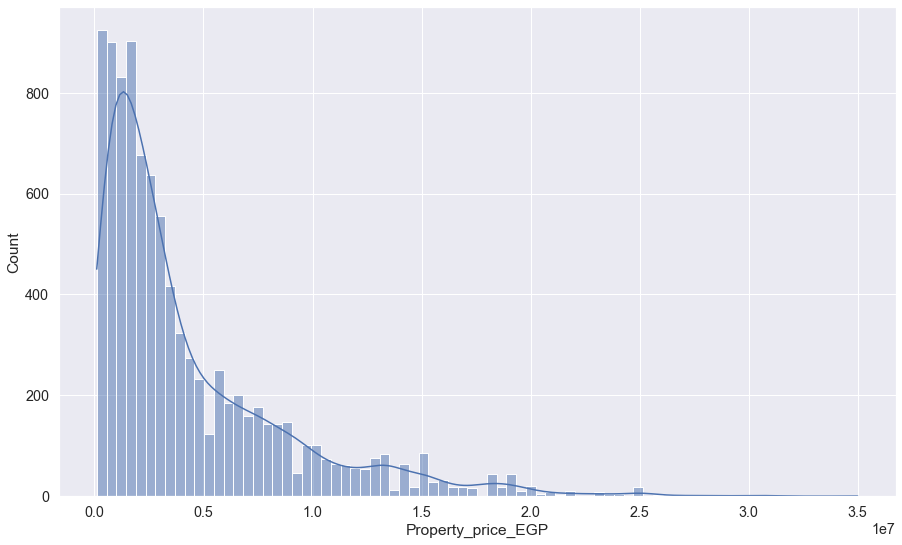

In [133]:
sns.histplot(x = df['Property_price_EGP'], kde = True)

# Modeling

In [134]:
lcr_key = list(df['Location_City'].unique())
lpt_key = list(df['Property_Type'].unique())

In [135]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Location_City'] = encoder.fit_transform(df['Location_City'])
df['Property_Type'] = encoder.fit_transform(df['Property_Type'])
df['Furnished'] = encoder.fit_transform(df['Furnished']) 

In [136]:
lcle_values = list(df['Location_City'].unique())
lpt_values = list(df['Property_Type'].unique())

In [137]:
res = {}
for key in lcr_key:
    for value in lcle_values:
        res[key] = value
        lcle_values.remove(value)
        break

In [138]:
res

{'Zahraa Al Maadi': 99,
 'Mokattam': 60,
 'New Cairo - El Tagamoa': 65,
 'Shorouk City': 85,
 'Al Manial': 11,
 'Sheikh Zayed': 83,
 '6th of October': 2,
 'Madinaty': 49,
 'Hadayek 6th of October': 32,
 'Heliopolis': 38,
 'Asyut City': 16,
 'New Capital City': 66,
 'Smoha': 90,
 '10th of Ramadan': 0,
 'Nasr City': 64,
 'North Coast': 70,
 'Ras al-Bar': 73,
 'Glim': 30,
 'New Nozha': 69,
 'Hurghada': 41,
 'Kafr Abdo': 44,
 'Laurent': 46,
 'Miami': 57,
 'Obour City': 71,
 'Agami': 5,
 'Sidi Beshr': 88,
 'Katameya': 45,
 'Badr City': 17,
 'Sheraton': 84,
 'Faisal': 23,
 'Dokki': 21,
 'Rehab City': 74,
 'Stanley': 92,
 'Gianaclis': 28,
 'Ain Shams': 7,
 'Zezenia': 101,
 'Camp Caesar': 19,
 'Shubra al-Khaimah': 87,
 'West Somid': 97,
 'Saba Pasha': 76,
 'Hadayek al-Ahram': 34,
 'Victoria': 96,
 'Maadi': 47,
 'Hadayek al-Kobba': 35,
 'Nakheel': 63,
 'Mandara': 51,
 'Helmeyat El Zaytoun': 39,
 'Tanta': 94,
 'Sidi Gaber': 89,
 'Mansura': 52,
 'Zagazig': 98,
 'Asafra': 15,
 'Salam City': 77,
 '

In [139]:
def city_trans(City):
    if City in res:
        return res[City]
    else :
        return 'The City Not Found'

In [140]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# columns = ['Property_price_EGP', 'Home_Space_SQM','Bed_Rooms','Bath_Rooms']
# df[columns] = scaler.fit_transform(df[columns])

In [141]:
features = df.drop(columns = ['Property_price_EGP','Location_governorate'])
target = df[['Property_price_EGP']]

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [143]:
# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [144]:
# models = {
#     "LR": LinearRegression(),
#     "KNNR" : KNeighborsRegressor(), 
#     "SVR": SVR(),
#     "DT": DecisionTreeRegressor(),
#     "RF": RandomForestRegressor(),
#     "XGBR": XGBRegressor()
# }

In [145]:
# for name, model in models.items():
#     print(f'Using model: {name}')
#     model.fit(x_train, y_train)
#     print(f'Training Score: {model.score(x_train, y_train)}')
#     print(f'Test Score: {model.score(x_test, y_test)}')  
#     print('-'*30)

### XGBRegressor and RandomForestRegressor give best results

In [146]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)
y_pred
r2_score(y_test, y_pred)

0.8142862422866537

In [147]:
df.columns

Index(['Property_price_EGP', 'Location_governorate', 'Location_City',
       'Bed_Rooms', 'Bath_Rooms', 'Home_Space_SQM', 'Furnished',
       'Property_Type'],
      dtype='object')

In [148]:
custom_data = np.array([[100,4,3,300,1,0]])
prediction = model.predict(custom_data)
prediction

array([10410166.66666667])

In [149]:
x_test.head()

,Location_City,Bed_Rooms,Bath_Rooms,Home_Space_SQM,Furnished,Property_Type
37135,70,3.0,2.0,145.0,1,1
3021,23,2.0,1.0,85.0,0,0
220,49,3.0,2.0,103.0,0,0
738,49,2.0,1.0,80.0,0,0
7555,49,2.0,1.0,77.0,0,0


In [150]:
import joblib

In [74]:
# joblib.dump(model, 'model.h5')
# # joblib.dump(scaler, 'scaler.h5')
# joblib.dump(features.columns, 'features.h5')